<a href="https://colab.research.google.com/github/DoItSon/playdata/blob/main/Python2/09_Pandas%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [8]:
DATA_PATH = "/content/drive/MyDrive/data/"

In [9]:
df = pd.read_csv(f"{DATA_PATH}titanic.csv")
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   pclass       1309 non-null   int64  
 3   name         1309 non-null   object 
 4   gender       1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


# 결측치 다루기

In [11]:
df.isnull() # 한행에 한열에 해당하는 값을 데이터 포인트라고 함.

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,True,False,False,False,False,True,False


In [12]:
df.isnull().sum() #axis 기본값은 0 즉 열별로 결측지 확인가능

passengerid       0
survived          0
pclass            0
name              0
gender            0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

- 시리즈에서 인덱스 가져오기

In [13]:
df.isnull().sum().index

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

- 시리즈에서 값들만 가져오기

In [14]:
df.isnull().sum().values

array([   0,    0,    0,    0,    0,  263,    0,    0,    0,    1, 1014,
          2])

In [15]:
df.isnull().sum().to_numpy() # 행렬로 변환한다.

array([   0,    0,    0,    0,    0,  263,    0,    0,    0,    1, 1014,
          2])

In [16]:
df.to_numpy()

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [1307, 0, 3, ..., 7.25, nan, 'S'],
       [1308, 0, 3, ..., 8.05, nan, 'S'],
       [1309, 0, 3, ..., 22.3583, nan, 'C']], dtype=object)

- 행에 결측치가 하나라도 있으면 삭제하기

In [17]:
df.dropna() # how="any" <== 기본값 데이터는 소중하기때문에 잘 안씀

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
1296,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
1298,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


- 행에 모든 값이 결측치라면 삭제하기

In [18]:
df.dropna(how="all")

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 결측치 채우기


In [19]:
df.isnull().sum()

passengerid       0
survived          0
pclass            0
name              0
gender            0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

- 최빈값으로 결측치 채우기

In [20]:
mode_value = df["embarked"].mode()[0] # 최빈값 (범주형 데이터는 최빈값으로 하고, 수치형은 평균값으로 한다. 그러나 답은 아니다!)
df["embarked"] = df["embarked"].fillna(mode_value)

In [21]:
df["cabin"] = df["cabin"].fillna("UNK")

In [22]:
median_value = df["fare"].median() # 중앙값으로 넣음 (표준편차가 높기때문에)
df["fare"] = df["fare"].fillna(median_value)
df["fare"]

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: fare, Length: 1309, dtype: float64

In [23]:
df["age"] = df["age"].fillna(df["age"].median())

In [24]:
df.isnull().sum().sum() # 결측치가 다 0이여서 모두 더하면 0!

0

# 특정 값들 포함 여부

- `isin` 메소드

In [25]:
 # S이거나 C인 항구를 보고싶다면?
lst = ["S","C"]
mask = df["embarked"].isin(lst)
df.loc[mask]

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,UNK,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S
1307,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,UNK,S


In [26]:
display(df.head()) # display를 사용하면 2개 다 볼 수 있다.
df.info #노트북환경일 때 마지막 값말고도 위에도 볼수있다 display사용하면

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNK,S


<bound method DataFrame.info of       passengerid  survived  pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   name  gender   age  sibsp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                

# 타입 변환하기

In [27]:
df["age"] = df["age"].astype("int32")
df["age"]

0       22
1       38
2       26
3       35
4       35
        ..
1304    28
1305    39
1306    38
1307    28
1308    28
Name: age, Length: 1309, dtype: int32

In [28]:
df["embarked"].astype("category") # 메모리를 많이 차지할땐 타입을 변환시켜 메모리를 줄여줄 수 있다.

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: embarked, Length: 1309, dtype: category
Categories (3, object): ['C', 'Q', 'S']

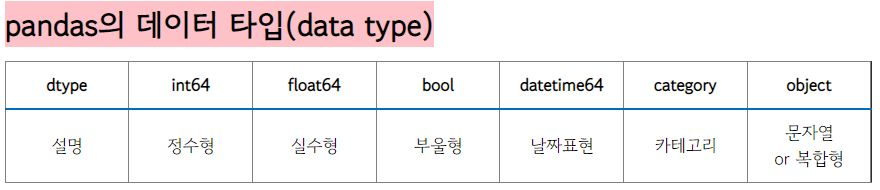

# 문자열다루기
- objecct 타입의 하위 속성인 `str` 을 이용하여 다양한 문자열 관련 메소드를 사용할수 있다.


In [29]:
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S


In [30]:
df["ticket"].str.strip() #앞뒤 공백제거, lstrip, rstirp

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: ticket, Length: 1309, dtype: object

In [31]:
df["ticket"].str.replace("/","_") # regex = True <= 정규표현식 옵션

0                A_5 21171
1                 PC 17599
2         STON_O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON_O.Q. 3101262
1307                359309
1308                  2668
Name: ticket, Length: 1309, dtype: object

In [32]:
df["ticket"].str.split() # 리스트로 바뀜

0                [A/5, 21171]
1                 [PC, 17599]
2         [STON/O2., 3101282]
3                    [113803]
4                    [373450]
                ...          
1304             [A.5., 3236]
1305              [PC, 17758]
1306    [SOTON/O.Q., 3101262]
1307                 [359309]
1308                   [2668]
Name: ticket, Length: 1309, dtype: object

In [33]:
df["name"].str.split(",",expand=True) # 데이터프레임 형태로 반환

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
1304,Spector,Mr. Woolf
1305,Oliva y Ocana,Dona. Fermina
1306,Saether,Mr. Simon Sivertsen
1307,Ware,Mr. Frederick


In [34]:
df["name"].str.len() # 문자열 길이 측정

0       23
1       51
2       22
3       44
4       24
        ..
1304    18
1305    28
1306    28
1307    19
1308    24
Name: name, Length: 1309, dtype: int64

In [35]:
df["name"].str[::-1]

0                                 sirraH newO .rM ,dnuarB
1       )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                  aniaL .ssiM ,nenikkieH
3            )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                                yrneH mailliW .rM ,nellA
                              ...                        
1304                                   flooW .rM ,rotcepS
1305                         animreF .anoD ,anacO y avilO
1306                         nestreviS nomiS .rM ,rehteaS
1307                                  kcirederF .rM ,eraW
1308                             J leahciM .retsaM ,reteP
Name: name, Length: 1309, dtype: object

In [36]:
df["name"]

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: name, Length: 1309, dtype: object

In [37]:
df["name"].str[::2]

0                     Ban,M.Oe ars
1       Cmns r.Jh rde Foec rgsTae)
2                      Hiknn is an
3           Ftel,Ms aqe et Ll a el
4                     Aln r ila er
                   ...            
1304                     Setr r ol
1305                OiayOaa oa emn
1306                Sehr r io iete
1307                    Wr,M.Feeik
1308                  Ptr atr ihe 
Name: name, Length: 1309, dtype: object

# 피벗테이블 사용해보기
- `pd.pivot_table`
- 데이터를 기준이 되는 컬럼을 집계하여 새롭게 표형태로 작성해주는 기능
- index: 행으로 사용할 컬럼이름
- columns: 열로 사용할 컬럼이름
- values: 집계 대상 컬럼
- aggfunc: values 에 대한 집계함수
    - std, var, mean, count, sum 등등
- fill_value: Nan에 대해 채울 값

group by 컬럼1(index) 컬럼2(columns)

In [38]:
df["age2"] = df["age"] //10
df

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,UNK,S,2
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,3
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S,3
1307,1308,0,3,"Ware, Mr. Frederick",male,28,0,0,359309,8.0500,UNK,S,2


- 나이대별 운임료의 평균을 알고 싶다면?
    - `group by age2`

In [39]:
tmp = pd.pivot_table(
    df, # 대상이 되는 데이터 프레임
    index = "age2",
    values = "fare",
    aggfunc = np.mean #"mean"
) # age 밑에 0~8은 컬럼이 아님!
tmp

,fare
age2,
0,29.310059
1,31.713172
2,23.742729
3,41.286781
4,42.396421
5,62.642201
6,69.926825
7,37.147629
8,30.000000


In [40]:
tmp.reset_index() # 인덱스를 컬럼으로 옮겨서 사용 (정돈화)

,age2,fare
0,0,29.310059
1,1,31.713172
2,2,23.742729
3,3,41.286781
4,4,42.396421
5,5,62.642201
6,6,69.926825
7,7,37.147629
8,8,30.000000


-  각 나이대에서 pclass 별로 생존률을 알고 싶다면?
    - group by age2, pclass와 비슷한 효과

In [41]:
tmp = pd.pivot_table(
    df,
    index = "age2",
    columns = "pclass", # 컬럼
    values = "survived",
    aggfunc="mean",
    # fill_value = 0 # 결측치 채움
 )
tmp # 인덱스가 2개이다. 컬럼부분이 위로 올라가 있다.

pclass,1,2,3
age2,,,
0,0.500000,0.909091,0.446429
1,0.772727,0.482759,0.315217
2,0.560440,0.377358,0.258537
3,0.694444,0.375000,0.260417
4,0.500000,0.387097,0.119048
5,0.521739,0.294118,0.000000
6,0.428571,0.285714,0.250000
7,0.250000,0.000000,0.000000
8,1.000000,NaN,NaN


In [42]:
tmp.reset_index()

pclass,age2,1,2,3
0,0,0.500000,0.909091,0.446429
1,1,0.772727,0.482759,0.315217
2,2,0.560440,0.377358,0.258537
3,3,0.694444,0.375000,0.260417
4,4,0.500000,0.387097,0.119048
5,5,0.521739,0.294118,0.000000
6,6,0.428571,0.285714,0.250000
7,7,0.250000,0.000000,0.000000
8,8,1.000000,NaN,NaN


- 각 나이대에 대하여 pclass 별 운임료에 대한 표준편차와 평균을 보고싶다면?

In [43]:
tmp = pd.pivot_table(
    df,
    index = "age2",
    columns = "pclass",
    values = "fare",
    aggfunc = ["skew",np.mean] # 최빈값 안됨!
)
tmp # 멀티 컬럼

skew                            mean                      
pclass         1         2         3           1          2          3
age2                                                                  
0      -1.672495  0.124216  0.595672  129.864575  29.064209  22.224177
1       1.019391  1.537841  2.274084  112.567614  25.605890  14.303536
2       1.512632  2.038175  3.730918   80.267215  19.864858  12.199623
3       2.800489  2.778215  2.968224   99.668982  19.281575  12.170268
4       1.782495  1.941873  1.791953   71.201616  23.259542  13.999305
5       3.176504  0.865329  2.508352   87.932063  16.433824   8.672029
6       1.145553  0.958788  1.180979   98.361510  19.148214   9.507300
7      -0.318243       NaN       NaN   58.502100  10.500000   7.762500
8            NaN       NaN       NaN   30.000000        NaN        NaN

In [44]:
tmp.columns

MultiIndex([('skew', 1),
            ('skew', 2),
            ('skew', 3),
            ('mean', 1),
            ('mean', 2),
            ('mean', 3)],
           names=[None, 'pclass'])

In [45]:
x = []
for i,k in tmp.columns: # 언패킹 생각을 못함!
    x.append(f"{i}_{k}")
tmp.columns = x
tmp

,skew_1,skew_2,skew_3,mean_1,mean_2,mean_3
age2,,,,,,
0,-1.672495,0.124216,0.595672,129.864575,29.064209,22.224177
1,1.019391,1.537841,2.274084,112.567614,25.605890,14.303536
2,1.512632,2.038175,3.730918,80.267215,19.864858,12.199623
3,2.800489,2.778215,2.968224,99.668982,19.281575,12.170268
4,1.782495,1.941873,1.791953,71.201616,23.259542,13.999305
5,3.176504,0.865329,2.508352,87.932063,16.433824,8.672029
6,1.145553,0.958788,1.180979,98.361510,19.148214,9.507300
7,-0.318243,NaN,NaN,58.502100,10.500000,7.762500
8,NaN,NaN,NaN,30.000000,NaN,NaN


In [46]:
tmp.reset_index()

,age2,skew_1,skew_2,skew_3,mean_1,mean_2,mean_3
0,0,-1.672495,0.124216,0.595672,129.864575,29.064209,22.224177
1,1,1.019391,1.537841,2.274084,112.567614,25.605890,14.303536
2,2,1.512632,2.038175,3.730918,80.267215,19.864858,12.199623
3,3,2.800489,2.778215,2.968224,99.668982,19.281575,12.170268
4,4,1.782495,1.941873,1.791953,71.201616,23.259542,13.999305
5,5,3.176504,0.865329,2.508352,87.932063,16.433824,8.672029
6,6,1.145553,0.958788,1.180979,98.361510,19.148214,9.507300
7,7,-0.318243,NaN,NaN,58.502100,10.500000,7.762500
8,8,NaN,NaN,NaN,30.000000,NaN,NaN


- 나이대별 pclass의 최빈값을 pivot_table로 만들어보세요.

In [47]:
tmp = pd.pivot_table(
    df,
    index = "age2",
    values = "pclass", # 컬럼
    # aggfunc = do_agg
    aggfunc = lambda x: x.mode() # 람다 생각을 못함!
)
tmp # df["pclass"].mode()는 전체 pclass의 최빈값이므로 틀리다.

,pclass
age2,
0,3
1,3
2,3
3,3
4,1
5,1
6,1
7,1
8,1


In [48]:
def do_agg(x): # 콜백 함수 사용도 가능! (생각을 못함!)
    return x.mode()

# `groupby` 메소드 사용하기
 - 데이터를 그룹화하여 집계해서 가공하는데 매우 중요하다.


 ```python
 DataFrame.groupby(<그룹핑 대상이 되는 컬럼>) ["집계대상이 되는 컬럼"].<집계 메소드>()
 ```
 - 그룹핑 대상이 되는 컬럼: 문자열 혹은 리스트로 전달

In [49]:
df.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3


- 항구별 생존률

In [50]:
df.groupby("embarked")["survived"].mean() # 시리즈 형태로 반환

embarked
C    0.492593
Q    0.439024
S    0.335153
Name: survived, dtype: float64

In [51]:
tmp = df.groupby("embarked")["fare"].std()
tmp.reset_index()

,embarked,fare
0,C,84.185996
1,Q,13.616133
2,S,37.119373


- `agg`메소드를 이용한 방법

In [52]:
df.groupby("age2")["fare"].agg("mean").reset_index()

,age2,fare
0,0,29.310059
1,1,31.713172
2,2,23.742729
3,3,41.286781
4,4,42.396421
5,5,62.642201
6,6,69.926825
7,7,37.147629
8,8,30.000000


- groupby 결과에 대한 딕셔너리를 이용하여 집계하는 예시

```python
DataFrame.groupby(<그룹핑대상컬럼>).agg(<딕셔너리>)
```

- 딕셔너리 예시
```python
{
    "집계대상컬럼": <함수 or 문자열>
}
```

In [53]:
agg_dict = {"fare":"mean"}
df.groupby("age2").agg(agg_dict).reset_index()

,age2,fare
0,0,29.310059
1,1,31.713172
2,2,23.742729
3,3,41.286781
4,4,42.396421
5,5,62.642201
6,6,69.926825
7,7,37.147629
8,8,30.000000


- 각 나이대에 대하여 pclass별 생존률을 보고 싶다면?

In [54]:
cols = ["age2","pclass"]
agg_dict = {"survived":"mean"}
tmp = df.groupby(cols).agg(agg_dict)
tmp.reset_index() # 조인 시 2개를 기준으로 해야 논리오류가 발생되지 않는다.

,age2,pclass,survived
0,0,1,0.500000
1,0,2,0.909091
2,0,3,0.446429
3,1,1,0.772727
4,1,2,0.482759
5,1,3,0.315217
6,2,1,0.560440
7,2,2,0.377358
8,2,3,0.258537
9,3,1,0.694444


- 여러 컬럼에 대한 집계

In [55]:
# 나이대별 생존률과 객실의 고유값개수 (다양성)
agg_dict = {"survived":"mean","cabin":"nunique"}
tmp = df.groupby("age2").agg(agg_dict)
tmp

,survived,cabin
age2,,
0,0.573171,8
1,0.419580,21
2,0.324547,63
3,0.426724,59
4,0.355556,47
5,0.414286,34
6,0.375000,16
7,0.142857,4
8,1.000000,1


- 집계 대상 컬럼 안에서 다양하게 집계하기

In [56]:
# 항구별 운임료의 표준편차와 평균, 객실의 다양성과 객실의 최빈값
agg_dict = {
    "fare":["std","mean"],
    "cabin":["nunique",("최빈값",lambda x : x.mode())]
}

tmp = df.groupby("embarked").agg(agg_dict)
tmp

fare              cabin     
                std       mean nunique  최빈값
embarked                                   
C         84.185996  62.336267      84  UNK
Q         13.616133  12.409012       4  UNK
S         37.119373  27.519476     105  UNK

- 집계 컬러명 정의해주기

In [57]:
# 항구별 운임료의 표준편차와 평균, 객실의 다양성과 객실의 최빈값
agg_dict = {
    "fare":[
        ("운임료_표준편차","std"),
        ("운임료_평균","mean")
        ],
    "cabin":[
        ("객실의 다양성","nunique"),
        ("객실_최빈값",lambda x : x.mode())
        ]
}

tmp = df.groupby("embarked").agg(agg_dict)
tmp

fare              cabin       
           운임료_표준편차     운임료_평균 객실의 다양성 객실_최빈값
embarked                                     
C         84.185996  62.336267      84    UNK
Q         13.616133  12.409012       4    UNK
S         37.119373  27.519476     105    UNK

In [58]:
tmp.columns = tmp.columns.droplevel() # fare, cabin 사라짐!
tmp

,운임료_표준편차,운임료_평균,객실의 다양성,객실_최빈값
embarked,,,,
C,84.185996,62.336267,84,UNK
Q,13.616133,12.409012,4,UNK
S,37.119373,27.519476,105,UNK


In [59]:
agg_dict = {
    "pclass":[("pclass별 평균","mean")]

}
tmp = df.groupby("embarked").agg(agg_dict)
tmp

,pclass
,pclass별 평균
embarked,
C,1.851852
Q,2.894309
S,2.344978


In [60]:
tmp.columns = tmp.columns.droplevel() # fare, cabin 사라짐!
tmp

,pclass별 평균
embarked,
C,1.851852
Q,2.894309
S,2.344978


# 데이터 프레임 병합하기

- concat
    - 수직 또는 수평으로 병합
    - `pd.concat` 함수에 데이터프레임 객체들을 리스트에 담아서 전달

In [61]:
pd.concat([df,df]) # axis = 0 

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,UNK,S,2
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,3
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S,3
1307,1308,0,3,"Ware, Mr. Frederick",male,28,0,0,359309,8.0500,UNK,S,2


In [62]:
pd.concat([df,df],axis = 1) # 옆으로 합침!

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,...,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,...,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,...,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,UNK,S,2
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,...,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,3
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,...,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S,3
1307,1308,0,3,"Ware, Mr. Frederick",male,28,0,0,359309,8.0500,...,"Ware, Mr. Frederick",male,28,0,0,359309,8.0500,UNK,S,2


- merge
    - 매우 자주 사용된다.
    - how 기본값은 inner(교집합)이다.

```python
pd.merge(<left df>,<right df>,on = "기준 컬럼", how="left")
```

In [63]:
features = df.copy()
features.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3


- cabin의 등장 빈도수를 특성으로 추가하고 싶다면?

In [64]:
tmp = df["cabin"].value_counts().reset_index()
tmp.columns = ["cabin","cabin_cnt"]
tmp

,cabin,cabin_cnt
0,UNK,1014
1,C23 C25 C27,6
2,B57 B59 B63 B66,5
3,G6,5
4,F33,4
...,...,...
182,A14,1
183,E63,1
184,E12,1
185,E38,1


In [65]:
features = pd.merge(features,tmp,how="left",on="cabin") # cabin_cnt 생성됨! (on 생략 시 동일한 컬럼명을 기준으로 머지된다.)
features.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2,cabin_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2,1014
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2,1014
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3,1014


- 머지되는 컬럼이 다수인 경우 (다시보기!)

In [66]:
# 각 항구에 대하여 pclass 별 운임료의 평균과 티켓의 다양성을 집계한 결과를 특성으로 추가!

agg_dict = {
    "fare":"mean", # 운임료의 평균
    "ticket":"nunique" # 티켓의 다양성
}
tmp = df.groupby(["embarked","pclass"]).agg(agg_dict)
tmp = tmp.add_prefix("feature_").reset_index()
tmp

,embarked,pclass,feature_fare,feature_ticket
0,C,1,106.845330,76
1,C,2,23.300593,20
2,C,3,11.021624,75
3,Q,1,90.000000,1
4,Q,2,11.735114,7
5,Q,3,10.390820,99
6,S,1,72.235825,113
7,S,2,21.206921,165
8,S,3,14.435460,375


In [67]:
features = pd.merge(features,tmp,how="left",on=["embarked","pclass"])
features.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2,cabin_cnt,feature_fare,feature_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2,1014,14.435460,375
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3,2,106.845330,76
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2,1014,14.435460,375
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,2,72.235825,113
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3,1014,14.435460,375


# apply 메소드
- series, DataFrame에 대한 단순한 집계가 아닌 구체적인 로직을 적용하고 싶을 때 사용
- 각 데이터에 대해 조건 검사 등과 같은 복잡한 처리 가능
- `apply` 메소드에 우리가 정의한 함수를 넣어주면 된다. (콜백함수를 넣는 것과 비슷)

- 항구별 가족수(sibsp+parch)의 평균을 구하고 싶다면?
    - agg 메소드로는 안된다. agg 메소드는 각 컬럼에 대해서만 집계가 가능하다.

In [68]:
def do_apply(x):
    return (x["sibsp"] + x["parch"]).mean()
df.groupby("embarked").apply(do_apply)

embarked
C    0.770370
Q    0.455285
S    0.974891
dtype: float64

- apply 경우 apply의 대상이 되는 데이터의 구조에 따라 다르게 처리하거나 축개념이 있다.

- series에 대한 apply
    - 축개념이 없고 한 행씩 처리한다.

In [69]:
df["gender"].apply(lambda x: 1 if x == "male" else 0)

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: gender, Length: 1309, dtype: int64

- DataFrame에 대한 apply
    - 축개념이 있다.
    - `axis = 0`: 행방향, 컬럼 단위로 처리, 기본값
    - `axis = 1`: 열방향, 행단위로 처리

In [70]:
df["age"].shape

(1309,)

In [71]:
def do_apply(x):
    print(x.shape)
    return x
tmp = df.apply(do_apply)

(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)
(1309,)


In [72]:
tmp

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,UNK,S,2
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,3
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S,3
1307,1308,0,3,"Ware, Mr. Frederick",male,28,0,0,359309,8.0500,UNK,S,2


In [73]:
df2 = df.iloc[:5]
df2

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3


In [74]:
def do_apply(x): # 열방향 행 단위
    print(x.shape)
    return x
tmp = df2.apply(do_apply,axis = 1)

(13,)
(13,)
(13,)
(13,)
(13,)


- groupby에 대한 apply
    - 데이터 프레임이 넘어간다.

In [75]:
def do_apply(x):
    display(x)
    print("="*50) # 구분선
    return x
tmp = df.groupby("embarked").apply(do_apply) # 항구가 3개라 3개로 넘어옴

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,UNK,C,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,28,0,0,2649,7.2250,UNK,C,2
26,27,0,3,"Emir, Mr. Farred Chehab",male,28,0,0,2631,7.2250,UNK,C,2
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,UNK,C,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43,1,0,17765,27.7208,D40,C,4
1296,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20,0,0,SC/PARIS 2166,13.8625,D38,C,2
1298,1299,0,1,"Widener, Mr. George Dunton",male,50,1,1,113503,211.5000,C80,C,5
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,3


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,UNK,Q,2
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,UNK,Q,0
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,UNK,Q,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28,0,0,330959,7.8792,UNK,Q,2
32,33,1,3,"Glynn, Miss. Mary Agatha",female,28,0,0,335677,7.7500,UNK,Q,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1288,0,3,"Colbert, Mr. Patrick",male,24,0,0,371109,7.2500,UNK,Q,2
1290,1291,0,3,"Conlon, Mr. Thomas Henry",male,31,0,0,21332,7.7333,UNK,Q,3
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,28,0,0,334915,7.7208,UNK,Q,2
1301,1302,1,3,"Naughton, Miss. Hannah",female,28,0,0,365237,7.7500,UNK,Q,2


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,UNK,S,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,UNK,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,UNK,S,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3,1,1,SOTON/O.Q. 3101315,13.7750,UNK,S,0
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28,0,0,347086,7.7750,UNK,S,2
1304,1305,0,3,"Spector, Mr. Woolf",male,28,0,0,A.5. 3236,8.0500,UNK,S,2
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,UNK,S,3


- 아규먼트 전달 예시

In [76]:
age_mean = df["age"].mean()
age_mean

29.484339190221544

In [77]:
# 항구별 평균나이와 전체 평균나이의 차이를 집계
def do_apply(x, age_mean):
    return x["age"].mean() - age_mean
# apply에 대한 콜백함수에 대한 추가 아규먼트를 전달하고 싶다면
# 키워드 아규먼트 전달방식으로 하면 된다.
df.groupby("embarked").apply(do_apply,age_mean = age_mean) # apply는 자동으로 x가 들어가는데 age_mean은 키워드 아규먼트를 동일하게 하여 함수를 실행한다.

embarked
C    1.889735
Q   -1.248567
S   -0.389361
dtype: float64

- pandas에서 progress bar 사용하기

In [78]:
from tqdm.auto import tqdm

In [79]:
tqdm.pandas() # 판다스에서 progress_apply 메소드를 사용할 수 있게 된다.

In [80]:
import time

def do_apply(x):
    time.sleep(0.01)
    return x
tmp = df.progress_apply(do_apply,axis = 1)

  0%|          | 0/1309 [00:00<?, ?it/s]

In [81]:
DATA_PATH = "/content/drive/MyDrive/data/"

# 백화점 구매 기록 데이터

In [82]:
df = pd.read_csv(f"{DATA_PATH}trans_train.csv")
df.head(50)

,고객번호,구매일자,지점,상품번호,중분류,대분류,구매가격
0,10004,2007-06-26 00:00:00,강남점,234160,영 트렌디,캐주얼,2720000
1,10004,2007-07-08 00:00:00,본 점,165162,4대 B/D,피혁잡화,8550000
2,10004,2007-07-14 00:00:00,본 점,663110,국산냉장고.세탁기,대형가전,28800000
3,10004,2007-07-28 00:00:00,본 점,73119,상품군미지정,기타,81500
4,10004,2007-07-28 00:00:00,본 점,73119,주류,주류,2037500
5,10004,2007-07-28 00:00:00,본 점,823126,N.B,침구/수예,34818000
6,10004,2007-07-28 00:00:00,본 점,124118,장갑(특정),섬유잡화,1794000
7,10004,2007-07-28 00:00:00,본 점,124118,우/양산(특정),섬유잡화,78000
8,10004,2007-07-28 00:00:00,본 점,673109,매트,생활잡화,3120000
9,10004,2007-08-01 00:00:00,본 점,607138,국산A/V,대형가전,41760000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167465 entries, 0 to 167464
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객번호    167465 non-null  int64 
 1   구매일자    167465 non-null  object
 2   지점      167465 non-null  object
 3   상품번호    167465 non-null  int64 
 4   중분류     167465 non-null  object
 5   대분류     167465 non-null  object
 6   구매가격    167465 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.9+ MB


In [84]:
df["지점"].isin(["본 점"]) # 본 점인데 False뜸

0         False
1         False
2         False
3         False
4         False
          ...  
167460    False
167461    False
167462    False
167463    False
167464    False
Name: 지점, Length: 167465, dtype: bool

In [85]:
df.iloc[1,2] # 본점이 띄어쓰기 2개이다.

'본  점'

# datetime으로 변환하기
- `pd.to_datetime` 함수
- 날짜형 자료형으로 변환하였을 경우 이점
    - 년, 월, 일, 시간 등등 datetime 관련 정보를 쉽게 추출할 수 있다.
    - datetime 자료형의 dt라는 하위 속성을 이용하여 필요한 날짜관련 정보를 쉽게 가져올 수 있다.

In [86]:
df["구매일자"] = pd.to_datetime(df["구매일자"])
df["구매일자"]

0        2007-06-26
1        2007-07-08
2        2007-07-14
3        2007-07-28
4        2007-07-28
            ...    
167460   2007-11-07
167461   2007-11-25
167462   2007-05-31
167463   2007-08-24
167464   2007-05-31
Name: 구매일자, Length: 167465, dtype: datetime64[ns]

In [87]:
df["구매일자"].dt.year # 연도

0         2007
1         2007
2         2007
3         2007
4         2007
          ... 
167460    2007
167461    2007
167462    2007
167463    2007
167464    2007
Name: 구매일자, Length: 167465, dtype: int64

In [88]:
df["구매일자"].dt.month # 월

0          6
1          7
2          7
3          7
4          7
          ..
167460    11
167461    11
167462     5
167463     8
167464     5
Name: 구매일자, Length: 167465, dtype: int64

In [89]:
df["구매일자"].dt.day # 일

0         26
1          8
2         14
3         28
4         28
          ..
167460     7
167461    25
167462    31
167463    24
167464    31
Name: 구매일자, Length: 167465, dtype: int64

In [90]:
df["구매일자"].dt.quarter # 분기

0         2
1         3
2         3
3         3
4         3
         ..
167460    4
167461    4
167462    2
167463    3
167464    2
Name: 구매일자, Length: 167465, dtype: int64

In [91]:
df["구매일자"].dt.weekday # 요일: 0 ~ 6 (월요일 ~ 일요일)

0         1
1         6
2         5
3         5
4         5
         ..
167460    2
167461    6
167462    3
167463    4
167464    3
Name: 구매일자, Length: 167465, dtype: int64

In [92]:
df["구매일자"].dt.dayofyear # 연기준 몇일째인지..

0         177
1         189
2         195
3         209
4         209
         ... 
167460    311
167461    329
167462    151
167463    236
167464    151
Name: 구매일자, Length: 167465, dtype: int64

https://pandas.pydata.org/docs/reference/frame.html

```
지점 컬럼에서 "본  점" 사이에 띄어쓰기 두칸을 한칸으로 변경하시오.
```

In [93]:
x_dict = {"본  점":"본 점"}
df["지점"].map(x_dict)

0         NaN
1         본 점
2         본 점
3         본 점
4         본 점
         ... 
167460    NaN
167461    NaN
167462    NaN
167463    NaN
167464    NaN
Name: 지점, Length: 167465, dtype: object

```
pivot_table 함수를 이용하여 고객별 구매가격의 평균값을 확인하시오.
```

In [94]:
x = pd.pivot_table(
    df,
    index = "고객번호",
    values = "구매가격",
    aggfunc = "mean"
)
x.reset_index()

,고객번호,구매가격
0,10004,5.737741e+06
1,10013,1.320459e+06
2,10023,1.901530e+06
3,10040,3.237965e+06
4,10052,3.228257e+06
...,...,...
2549,49813,1.278384e+05
2550,49892,4.493374e+05
2551,49925,5.524667e+05
2552,49943,3.703855e+06


```
pivot_table 함수를 이용하여 각 고객에 대하여 대분류별로 구매가격의 표준편차를 확인하시오.
```

In [95]:
x = pd.pivot_table(
    df,
    index = "고객번호",
    columns = "대분류",
    values = "구매가격",
    aggfunc = "std"
)
x.reset_index()

대분류,고객번호,가공식품,가구,건강식품,골프,교복,구두,기타,기타의류,남성 캐주얼,...,준보석/시계,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
0,10004,36316.914792,NaN,427799.602618,3.556394e+06,NaN,509965.410592,91694.578694,NaN,NaN,...,NaN,NaN,NaN,3.036967e+06,1.978404e+06,NaN,NaN,1.611765e+06,NaN,NaN
1,10013,23902.301144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10023,88637.193096,NaN,NaN,4.611664e+06,NaN,NaN,250142.374619,113844.191771,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10040,NaN,NaN,NaN,NaN,NaN,949846.303356,107913.321698,NaN,NaN,...,NaN,NaN,26582.926852,NaN,1.546725e+07,NaN,NaN,NaN,NaN,3.102744e+06
4,10052,37282.712499,NaN,NaN,NaN,NaN,NaN,447294.052661,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.994352e+07,NaN,NaN,NaN,1.078371e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,49813,58960.266233,NaN,NaN,NaN,NaN,NaN,17715.047161,NaN,NaN,...,NaN,16023.420359,6242.644156,1.087612e+05,7.090056e+05,NaN,NaN,NaN,NaN,1.007627e+06
2086,49892,64401.408947,NaN,NaN,NaN,NaN,NaN,12407.549022,NaN,NaN,...,NaN,33372.683940,3081.380720,3.307144e+06,NaN,NaN,NaN,NaN,NaN,2.192625e+06
2087,49925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2088,49943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.719231e+06


- 고유한 고객번호로만 이루어진 데이터프레임을 만들어 features 변수에 넣으시오.
- 컬럼명은 고객번호로 하시오.
- 컬럼이 고객번호만 있는 데이터프레임을 만들라는 의미
- 중복 고객 번호가 있으면 안된다.

In [96]:
features = df["고객번호"].unique()
features = pd.DataFrame(features,columns = ["고객번호"])
features

,고객번호
0,10004
1,10013
2,10023
3,10040
4,10052
...,...
2549,49813
2550,49892
2551,49925
2552,49943


groupby 메소드를 이용하여 고객별로 구매가격의 평균을 구하고 
데이터프레임 형식으로 정돈하여 구매가격의 컬럼명을 변경하여
features 변수의 데이터프레임과 left merge 하시오.

In [97]:
tmp = df.groupby("고객번호")["구매가격"].mean()
tmp = tmp.reset_index()
tmp

,고객번호,구매가격
0,10004,5.737741e+06
1,10013,1.320459e+06
2,10023,1.901530e+06
3,10040,3.237965e+06
4,10052,3.228257e+06
...,...,...
2549,49813,1.278384e+05
2550,49892,4.493374e+05
2551,49925,5.524667e+05
2552,49943,3.703855e+06


In [98]:
cols = tmp.columns.tolist()
cols[1] = "구매가격2"
tmp.columns = cols
tmp.head()
tmp

,고객번호,구매가격2
0,10004,5.737741e+06
1,10013,1.320459e+06
2,10023,1.901530e+06
3,10040,3.237965e+06
4,10052,3.228257e+06
...,...,...
2549,49813,1.278384e+05
2550,49892,4.493374e+05
2551,49925,5.524667e+05
2552,49943,3.703855e+06


In [99]:
features = pd.merge(tmp,features,how="left",on="고객번호")
features.head()

,고객번호,구매가격2
0,10004,5.737741e+06
1,10013,1.320459e+06
2,10023,1.901530e+06
3,10040,3.237965e+06
4,10052,3.228257e+06


In [100]:
agg_dict = {"구매가격":"mean"}
tmp = df.groupby("고객번호").agg(agg_dict).reset_index().rename(columns={"구매가격":"구매가격_평균"})
features = features.merge(tmp,how="left",on="고객번호") # 메소드와 함수 (pd., features.) 방법이 있다.
features

,고객번호,구매가격2,구매가격_평균
0,10004,5.737741e+06,5.737741e+06
1,10013,1.320459e+06,1.320459e+06
2,10023,1.901530e+06,1.901530e+06
3,10040,3.237965e+06,3.237965e+06
4,10052,3.228257e+06,3.228257e+06
...,...,...,...
2549,49813,1.278384e+05,1.278384e+05
2550,49892,4.493374e+05,4.493374e+05
2551,49925,5.524667e+05,5.524667e+05
2552,49943,3.703855e+06,3.703855e+06


groupby 메소드를 이용하여 고객별로 구매가격의 최대값과 대분류의 고유값개수(다양성)를 데이터프레임 형식으로 정돈하고
구매가격과 대분류의 컬럼명을 변경하여
features 변수의 데이터프레임과 left merge 하시오.

In [101]:
agg_dict = {"구매가격":"max","대분류":"nunique"}
tmp = df.groupby("고객번호").agg(agg_dict)
tmp = tmp.add_prefix("pre_").reset_index()
tmp

,고객번호,pre_구매가격,pre_대분류
0,10004,41760000,25
1,10013,13375000,9
2,10023,14325000,17
3,10040,24738000,15
4,10052,38328000,20
...,...,...,...
2549,49813,9120000,20
2550,49892,7500000,20
2551,49925,1015000,1
2552,49943,21780000,7


In [102]:
features = pd.merge(tmp,features,how="left",on="고객번호")
features.head()

,고객번호,pre_구매가격,pre_대분류,구매가격2,구매가격_평균
0,10004,41760000,25,5.737741e+06,5.737741e+06
1,10013,13375000,9,1.320459e+06,1.320459e+06
2,10023,14325000,17,1.901530e+06,1.901530e+06
3,10040,24738000,15,3.237965e+06,3.237965e+06
4,10052,38328000,20,3.228257e+06,3.228257e+06


groupby 메소드를 이용하여 고객별로 구매가격의 최소값과, 총구매액,
그리고 지점의 고유값 개수와 최빈값을 구하시오
구하는 과정에서 집계 컬럼에 대한 컬럼명도 정의하시오.
데이터 프레임 형식으로 정돈하여 
features 변수의 데이터프레임과 left merge 하시오.

In [103]:
agg_dict = {"구매가격":[
    ("구매가격의 최소값","min"),
    ("총구매액","sum")
    ],
            "지점":[
                ("지점의 고유값 개수","nunique"),
                ("최빈값",lambda x : x.mode())
                ]}
tmp = df.groupby("고객번호").agg(agg_dict)
tmp

구매가격                    지점      
      구매가격의 최소값       총구매액 지점의 고유값 개수   최빈값
고객번호                                       
10004  -4700000  390166360          3  본  점
10013      6900   22447800          3  본  점
10023  -6003000   81765810          3   잠실점
10040  -6588000  213705680          2  부산본점
10052 -10750000  358336570          4   인천점
...         ...        ...        ...   ...
49813   -882000   47428060          1  부산본점
49892      1100   54369820          2   강남점
49925     39000    1657400          1  본  점
49943     36000   40742400          1  본  점
49974      5000    7273000          3   강남점

[2554 rows x 4 columns]

In [104]:
tmp.columns = tmp.columns.droplevel() 
tmp

,구매가격의 최소값,총구매액,지점의 고유값 개수,최빈값
고객번호,,,,
10004,-4700000,390166360,3,본 점
10013,6900,22447800,3,본 점
10023,-6003000,81765810,3,잠실점
10040,-6588000,213705680,2,부산본점
10052,-10750000,358336570,4,인천점
...,...,...,...,...
49813,-882000,47428060,1,부산본점
49892,1100,54369820,2,강남점
49925,39000,1657400,1,본 점


In [105]:
features = pd.merge(tmp,features,how="left",on="고객번호")
features.head()

,고객번호,구매가격의 최소값,총구매액,지점의 고유값 개수,최빈값,pre_구매가격,pre_대분류,구매가격2,구매가격_평균
0,10004,-4700000,390166360,3,본 점,41760000,25,5.737741e+06,5.737741e+06
1,10013,6900,22447800,3,본 점,13375000,9,1.320459e+06,1.320459e+06
2,10023,-6003000,81765810,3,잠실점,14325000,17,1.901530e+06,1.901530e+06
3,10040,-6588000,213705680,2,부산본점,24738000,15,3.237965e+06,3.237965e+06
4,10052,-10750000,358336570,4,인천점,38328000,20,3.228257e+06,3.228257e+06


In [106]:
agg_dict = {"구매가격":[  
    ("구매가격의 최소값",lambda x : x[x>0].min()),  # 환불하는 경우를 배제함
    ("총구매액","sum")
    ],
            "지점":[
                ("지점의 고유값 개수","nunique"),
                ("최빈값",lambda x : x.mode())
                ]}
tmp = df.groupby("고객번호").agg(agg_dict)
tmp.columns = tmp.columns.droplevel()
tmp.reset_index()
features = pd.merge(tmp,features,how="left",on="고객번호")
features.head()

,고객번호,구매가격의 최소값_x,총구매액_x,지점의 고유값 개수_x,최빈값_x,구매가격의 최소값_y,총구매액_y,지점의 고유값 개수_y,최빈값_y,pre_구매가격,pre_대분류,구매가격2,구매가격_평균
0,10004,6570.0,390166360,3,본 점,-4700000,390166360,3,본 점,41760000,25,5.737741e+06,5.737741e+06
1,10013,6900.0,22447800,3,본 점,6900,22447800,3,본 점,13375000,9,1.320459e+06,1.320459e+06
2,10023,1250.0,81765810,3,잠실점,-6003000,81765810,3,잠실점,14325000,17,1.901530e+06,1.901530e+06
3,10040,1500.0,213705680,2,부산본점,-6588000,213705680,2,부산본점,24738000,15,3.237965e+06,3.237965e+06
4,10052,1250.0,358336570,4,인천점,-10750000,358336570,4,인천점,38328000,20,3.228257e+06,3.228257e+06
